# SVC Model

### Import Dependencies

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Stored in directory: /Users/morganivey/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition",axis=1)
X = selected_features

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
y = df['koi_disposition']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    stratify=y)

In [11]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4002,0,0,1,0,99.673478,3.463000e-04,-3.463000e-04,219.334830,0.002300,-0.002300,...,-148,4.777,0.040,-0.027,0.492,0.026,-0.027,293.05801,45.248821,15.801
4246,0,1,0,0,0.592244,9.000000e-08,-9.000000e-08,131.654831,0.000124,-0.000124,...,-146,4.664,0.056,-0.032,0.591,0.045,-0.045,290.28094,45.464260,15.653
548,0,1,1,0,9.991625,5.360000e-06,-5.360000e-06,137.447816,0.000445,-0.000445,...,-176,4.338,0.153,-0.187,1.096,0.309,-0.206,301.04239,45.022888,14.039
3953,0,1,0,0,178.412990,3.100000e-05,-3.100000e-05,218.225235,0.000127,-0.000127,...,-134,4.346,0.084,-0.126,1.148,0.202,-0.124,288.32785,38.627621,13.944
2362,0,0,0,0,45.294223,5.600000e-05,-5.600000e-05,138.678725,0.000987,-0.000987,...,-68,4.347,0.030,-0.030,1.044,0.057,-0.042,285.67938,50.241299,10.961


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/morganivey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Model



In [13]:
from sklearn.svm import SVC 
# Create the SVC model
model2 = SVC(kernel='linear')

In [14]:
# Fit the SVC model to the training data
model2.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# Score the original model
original_model_train_score = model2.score(X_train_scaled, y_train)
original_model_test_score = model2.score(X_test_scaled, y_test)

#Print the original model training and testing scores
print(f"Training Data Score: {original_model_train_score}")
print(f"Testing Data Score: {original_model_test_score}")

Training Data Score: 0.8439824527942018
Testing Data Score: 0.8415331807780321


In [16]:
# Create predicition and classification report for original model
from sklearn.metrics import classification_report
prediction = model2.predict(X_test_scaled)
original_classification_report = classification_report(y_test,prediction,
                            target_names=['CANDIDATE','CONFIRMED','FALSE POSITIVE'])
print(original_classification_report)

                precision    recall  f1-score   support

     CANDIDATE       0.74      0.59      0.66       422
     CONFIRMED       0.67      0.77      0.72       450
FALSE POSITIVE       0.98      1.00      0.99       876

     micro avg       0.84      0.84      0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



### Preform feature selection with RFE
Determine what number of important features yields the best score for the model

In [17]:
from sklearn.feature_selection import RFE
num_features = len(X_train.columns) #40 total
num_top_features_list = [5,10,15,20,25,30]
top_train_score = 0
top_test_score = 0

# Preform RFE with 5,10,15,20,25, and 30 features and print the training score, testing score, and classification report
for num_top_features in num_top_features_list:
    rfe = RFE(estimator=model2, n_features_to_select=num_top_features,step=1)
    rfe.fit(X_train_scaled,y_train)


    ranks=rfe.ranking_
    n_features=num_top_features
    feature_indexes=[]
    for i in range(0,len(ranks)):
        if ranks[i]==1:
            feature_indexes+=[i]
    # Create the new training and testing data (filtered out by the number of features in loop)
    X_train_new = rfe.transform(X_train_scaled)
    X_test_new = rfe.transform(X_test_scaled)

    # Create the SVC model, fit the model with the filtered training data, score the model
    model_rfe = SVC(kernel='linear')
    model_rfe.fit(X_train_new,y_train)
    print(f'Number of Important Features : {num_top_features} ')
    train_score = model_rfe.score(X_train_new, y_train)
    test_score = model_rfe.score(X_test_new, y_test)
    print(f"Training Data Score: {train_score}")
    print(f"Testing Data Score: {test_score}")
    
    # Determine the best score from all cases
    if train_score > top_train_score:
        top_train_score = train_score
        top_num_features_train = num_top_features
    if test_score > top_test_score:
        top_test_score = test_score
        top_num_features_test = num_top_features
    # Use the model to predict based on the testing data and create a classification report
    prediction_rfe = model_rfe.predict(X_test_new)
    print(classification_report(y_test,prediction_rfe,
                                target_names=['CANDIDATE','CONFIRMED','FALSE POSITIVE']))
    print('==============================================')

# Print the highest training and testing scores, with the corresponding number of features
print(f'The highest train score is {top_train_score} with {top_num_features_train} features')
print(f'The highest test score is {top_test_score} with {top_num_features_test} features')

#Best Model (based on training data score):
rfe = RFE(estimator=model2, n_features_to_select=top_num_features_test,step=1)
rfe.fit(X_train_scaled,y_train)


ranks=rfe.ranking_
n_features=top_num_features_test
feature_indexes=[]
for i in range(0,len(ranks)):
    if ranks[i]==1:
        feature_indexes+=[i]
X_train_new = rfe.transform(X_train_scaled)
X_test_new = rfe.transform(X_test_scaled)

# Print the best model training data score, testing data score, and classification report 
model_rfe = SVC(kernel='linear')
model_rfe.fit(X_train_new,y_train)
train_score = model_rfe.score(X_train_new, y_train)
test_score = model_rfe.score(X_test_new, y_test)
print('==============================================')
print(f'The best model to be used has {top_num_features_test} features:')
print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")
prediction_rfe = model_rfe.predict(X_test_new)
print(classification_report(y_test,prediction_rfe,
                            target_names=['CANDIDATE','CONFIRMED','FALSE POSITIVE']))
print('==============================================')

Number of Important Features : 5 
Training Data Score: 0.6139614724394431
Testing Data Score: 0.6092677345537757
                precision    recall  f1-score   support

     CANDIDATE       0.33      0.00      0.01       422
     CONFIRMED       0.54      0.68      0.60       450
FALSE POSITIVE       0.65      0.87      0.74       876

     micro avg       0.61      0.61      0.61      1748
     macro avg       0.51      0.52      0.45      1748
  weighted avg       0.54      0.61      0.53      1748

Number of Important Features : 10 
Training Data Score: 0.6694640473011635
Testing Data Score: 0.6739130434782609
                precision    recall  f1-score   support

     CANDIDATE       0.73      0.19      0.30       422
     CONFIRMED       0.58      0.69      0.63       450
FALSE POSITIVE       0.71      0.90      0.80       876

     micro avg       0.67      0.67      0.67      1748
     macro avg       0.67      0.59      0.58      1748
  weighted avg       0.68      0.67     

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50, 100,1000],
              'gamma': [0.0001, 0.0005, 0.001,.005],
             'kernel':['rbf','linear','poly']}

grid2 = GridSearchCV(model_rfe, param_grid, verbose=3)

In [19]:
# Train the model with GridSearch
grid2.fit(X_train_new, y_train)

/Users/morganivey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5011441647597255, total=   0.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5011441647597255, total=   1.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5014310246136233, total=   1.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8501144164759725, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8329519450800915, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8277046365197481, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.5011441647597255, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.5011441647597255, total=   0.8s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.5014310246136233, total=   1.0s
[CV] C=1, gamma=0.0005,

[CV]  C=5, gamma=0.001, kernel=linear, score=0.8558352402745996, total=   0.2s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV]  C=5, gamma=0.001, kernel=linear, score=0.8488838008013738, total=   0.2s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV]  C=5, gamma=0.001, kernel=poly, score=0.5011441647597255, total=   0.5s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV]  C=5, gamma=0.001, kernel=poly, score=0.5011441647597255, total=   0.7s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV]  C=5, gamma=0.001, kernel=poly, score=0.5014310246136233, total=   0.7s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV]  C=5, gamma=0.005, kernel=rbf, score=0.7837528604118993, total=   0.8s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV]  C=5, gamma=0.005, kernel=rbf, score=0.7791762013729977, total=   0.5s
[CV] C=5, gamma=0.005, kernel=rbf

[CV]  C=50, gamma=0.0001, kernel=linear, score=0.8815111619919863, total=   0.2s
[CV] C=50, gamma=0.0001, kernel=poly .................................
[CV]  C=50, gamma=0.0001, kernel=poly, score=0.5011441647597255, total=   0.5s
[CV] C=50, gamma=0.0001, kernel=poly .................................
[CV]  C=50, gamma=0.0001, kernel=poly, score=0.5011441647597255, total=   0.6s
[CV] C=50, gamma=0.0001, kernel=poly .................................
[CV]  C=50, gamma=0.0001, kernel=poly, score=0.5014310246136233, total=   0.6s
[CV] C=50, gamma=0.0005, kernel=rbf ..................................
[CV]  C=50, gamma=0.0005, kernel=rbf, score=0.7837528604118993, total=   0.4s
[CV] C=50, gamma=0.0005, kernel=rbf ..................................
[CV]  C=50, gamma=0.0005, kernel=rbf, score=0.7791762013729977, total=   0.7s
[CV] C=50, gamma=0.0005, kernel=rbf ..................................
[CV]  C=50, gamma=0.0005, kernel=rbf, score=0.7899255867200916, total=   0.4s
[CV] C=50, gamma=0.000

[CV]  C=100, gamma=0.001, kernel=poly, score=0.5011441647597255, total=   0.5s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.5011441647597255, total=   0.6s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.5014310246136233, total=   0.7s
[CV] C=100, gamma=0.005, kernel=rbf ..................................
[CV]  C=100, gamma=0.005, kernel=rbf, score=0.8506864988558352, total=   0.3s
[CV] C=100, gamma=0.005, kernel=rbf ..................................
[CV]  C=100, gamma=0.005, kernel=rbf, score=0.8329519450800915, total=   0.5s
[CV] C=100, gamma=0.005, kernel=rbf ..................................
[CV]  C=100, gamma=0.005, kernel=rbf, score=0.8277046365197481, total=   0.4s
[CV] C=100, gamma=0.005, kernel=linear ...............................
[CV]  C=100, gamma=0.005, kernel=linear, score=0.8884439359267735, total=   0.2s
[CV] C=100, gamma=0.00

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  3.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50, 100, 1000], 'gamma': [0.0001, 0.0005, 0.001, 0.005], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [20]:
# Print the best score, C, Kernel, and Gamma
print(f'Best score : {grid2.best_score_}')
print('--------------------------')
print(f'Best C : {grid2.best_estimator_.C}')
print(f'Best Kernel : {grid2.best_estimator_.kernel}')
print(f'Best Gamma: {grid2.best_estimator_.gamma}')

Best score : 0.888613389280946
--------------------------
Best C : 1000
Best Kernel : linear
Best Gamma: 0.0001


In [31]:
# Use the grid model to predict using the filtered testing data
prediction_grid = grid2.predict(X_test_new)
best_model_classification_report = classification_report(y_test,prediction_grid)
print(best_model_classification_report)

                precision    recall  f1-score   support

     CANDIDATE       0.81      0.68      0.74       422
     CONFIRMED       0.74      0.83      0.78       450
FALSE POSITIVE       0.98      1.00      0.99       876

     micro avg       0.88      0.88      0.88      1748
     macro avg       0.84      0.83      0.84      1748
  weighted avg       0.88      0.88      0.87      1748



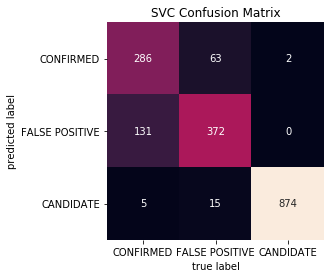

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, prediction_grid)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y.unique(),
            yticklabels=y.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVC Confusion Matrix')
plt.savefig('Output/SVC_ConfusionMatrix.png')

In [37]:
# Apply the classifier trained using the testing data (scaled X, y), and view the accuracy score
grid2.score(X_test_new, y_test)

0.8764302059496567

In [38]:
# Train a new classifier using the best parameters found by the grid search
best_model = SVC(C = grid2.best_estimator_.C,
                 kernel = grid2.best_estimator_.kernel,
                 gamma=grid2.best_estimator_.gamma)
model_fit = best_model.fit(X_train_new, y_train)
best_model_score = model_fit.score(X_test_new,y_test)
print(f'Best Model Score : {best_model_score}')

Best Model Score : 0.8764302059496567


Percentage Increases:
Scaled model to Grid model : 4.1468%
Scaled model to Feature Selection model : 0.4079%
Feature Selection model to Grid model : 3.7238%


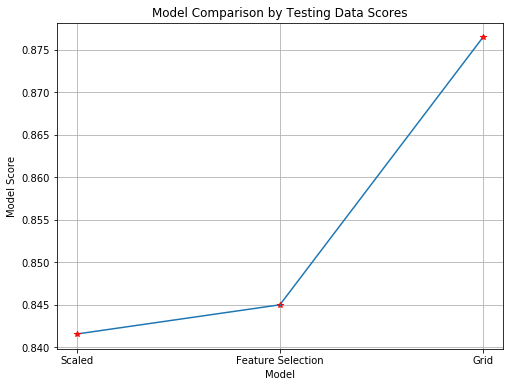

In [39]:
percInc_1 = ((best_model_score-test_score)/test_score)*100
percInc_2 = ((test_score-original_model_test_score)/original_model_test_score)*100
percInc_3 = ((best_model_score-original_model_test_score)/original_model_test_score)*100

# Display the percentage increases for each type of model
print('Percentage Increases:')
print(f'Scaled model to Grid model : {round(percInc_3,4)}%')
print(f'Scaled model to Feature Selection model : {round(percInc_2,4)}%')
print(f'Feature Selection model to Grid model : {round(percInc_1,4)}%')

# Plot the model traning data scores for the scaled model, feature selection (RFE) model and the GridSearchCV (Hyperparameter tuned) model
plt.figure(figsize=(8,6))
plt.plot([0,1,2],[original_model_test_score, test_score, best_model_score],marker='*',markeredgecolor='red')
plt.xticks([0,1,2],labels=['Scaled','Feature Selection','Grid'])
plt.xlabel('Model')
plt.ylabel('Model Score')
plt.title('Model Comparison by Testing Data Scores')
plt.grid()
plt.savefig('Output/SVC_ModelComparison_TestingScores.png')

In [42]:
feature_selection_classification_report = classification_report(y_test,prediction_rfe,
                            target_names=['CANDIDATE','CONFIRMED','FALSE POSITIVE'])

# Print the classification reports for each model (scaled, feature selection, and grid)
print('Classification Reports')
print('Scaled (MinMaxScaler):')
print(original_classification_report)
print('---------------------------------------------------------')
print('Feature Selection (RFE)')
print(feature_selection_classification_report)
print('---------------------------------------------------------')
print('Grid')
print(best_model_classification_report)

file = open('Output/SVC_classification_report.txt','w')
file.write('Classification Reports\n')
file.write('\nScaled (MinMaxScaler):\n')
file.write(original_classification_report)
file.write('\n---------------------------------------------------------\n')
file.write('Feature Selection (RFE)\n')
file.write(feature_selection_classification_report)
file.write('\n---------------------------------------------------------\n')
file.write('Grid\n')
file.write(best_model_classification_report)
file.close()

Classification Reports
Scaled (MinMaxScaler):
                precision    recall  f1-score   support

     CANDIDATE       0.74      0.59      0.66       422
     CONFIRMED       0.67      0.77      0.72       450
FALSE POSITIVE       0.98      1.00      0.99       876

     micro avg       0.84      0.84      0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748

---------------------------------------------------------
Feature Selection (RFE)
                precision    recall  f1-score   support

     CANDIDATE       0.75      0.59      0.66       422
     CONFIRMED       0.68      0.78      0.73       450
FALSE POSITIVE       0.98      1.00      0.99       876

     micro avg       0.84      0.84      0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.85      0.84      0.84      1748

---------------------------------------------------------
Grid
                pre

# Save the Model

In [43]:
import joblib
filename = 'morgan_ivey.sav'
joblib.dump(model_fit, filename)

['morgan_ivey.sav']